This notebook will try and recreate the stemformatics blood atlas

In [1]:
%load_ext blackcellmagic

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# For testing
iris = sns.load_dataset("iris")

# Functions

In [4]:
# def transform_to_percentile(dataframe):
#     """
#     Apparently this is properly called the spearman rank
#     """
#     transformed_dataframe = (
#         dataframe.shape[0]
#         - dataframe.rank(axis=0, ascending=False, na_option="bottom")
#         + 1
#     ) / dataframe.shape[0]
#     return transformed_dataframe

In [5]:
def spearman_rank(df):
    return df.rank(axis=0, ascending=True, na_option="bottom", pct=True)

In [23]:
a = pd.DataFrame(np.random.random((100, 100)))
assert np.all(transform_to_percentile(a) == spearman_rank(a))

# Reading

## Dataset annotation

In [74]:
blood_metadata = pd.read_hdf("../data/metadata.h5") # I think this is all stemformatics metadata?

In [76]:
all_annot = pd.read_csv("../blood_atlas_annotations_130519.tsv", sep="\t", index_col="sample_id")
blood_annot = all_annot[all_annot["include_blood"]].copy()

In [78]:
# Format dataset names
blood_annot.index = blood_annot.index + ";" + blood_annot["dataset_id"].astype(str)

In [79]:
blood_annot["celltype"] = blood_annot["parental_cell_type"] # TODO: ask paul if this is right

blood_annot = blood_annot[
    ["display_metadata", "tier1", "tier2", "tier3", "celltype", "display_metadata"]
].join(metadata, how="inner")

## Expression

In [84]:
blood = pd.read_hdf("../data/blood_atlas_data.h5")
assert not blood.isna().any().any()

In [85]:
blood = blood[blood_annot.index]

In [86]:
blood.shape

(13095, 853)

In [87]:
blood

,GSM994853;6463,GSM994851;6463,FANTOM6-7;7079,FANTOM-15;7079,FANTOM6-5;7079,FANTOM9;7079,FANTOM11;7079,FANTOM-17;7079,FANTOM13;7079,FANTOM-19;7079,...,GSM1210383;6339,GSM1210384;6339,GSM1210396;6339,GSM1210397;6339,GSM1210398;6339,GSM1210399;6339,GSM1210400;6339,GSM1210393;6339,GSM1210394;6339,GSM1210395;6339
ENSG00000000003,3.33278,4.16270,0.084470,0.000000,0.156173,0.780501,0.050196,0.944161,2.161089,0.000000,...,6.184306,6.701142,3.272074,3.658898,3.533382,3.299137,3.647660,5.740131,4.430764,4.609542
ENSG00000000005,3.28012,3.34402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.722203,1.665041,1.935963,1.589004,1.808742,1.417300,1.645999,1.779135,1.446061,1.675059
ENSG00000000419,10.34765,10.68934,3.180372,2.685402,4.885845,3.635613,3.318937,3.908029,3.355088,3.374633,...,9.266823,9.977903,10.142088,10.315200,10.121450,10.679456,10.492519,9.846215,10.019621,10.149682
ENSG00000000938,10.36331,10.70236,6.820916,5.642872,6.692358,6.115849,5.535635,5.583088,6.211880,5.697062,...,3.077604,2.696972,3.837414,4.922661,4.955829,4.999937,5.571717,4.593247,3.563550,4.504524
ENSG00000000971,6.23841,4.76062,0.951092,0.709072,1.874042,1.264138,0.814717,0.724494,1.813571,0.542857,...,6.303753,5.828390,2.351645,3.965674,3.667129,4.335882,5.184721,6.324902,6.363524,7.365573
ENSG00000001036,9.68525,9.42119,3.158733,3.273286,3.207503,3.370373,3.939525,3.390222,3.305614,3.520020,...,4.825516,5.089122,4.981588,6.188980,6.491149,6.269858,6.846581,7.038958,6.710265,7.059249
ENSG00000001167,8.44912,8.45983,3.597827,2.966460,2.991936,2.928980,3.305933,3.563096,3.301552,2.959077,...,7.831354,6.590173,9.259506,8.829111,8.071375,8.546217,7.883357,8.103852,8.330205,8.612001
ENSG00000001460,4.29170,4.60856,0.554923,0.500647,0.204511,0.263422,0.166876,0.586091,0.150252,0.000000,...,2.649951,2.837922,2.457807,2.772336,2.980270,2.765645,2.633874,2.898281,2.924215,2.638924
ENSG00000001461,6.34554,6.00545,1.425755,1.124327,0.607644,1.050548,1.200138,1.739645,1.209586,0.583588,...,6.646028,5.050112,6.291900,6.891822,6.046198,6.205022,6.234156,6.468761,6.594477,6.814441
ENSG00000001497,7.67193,7.47149,2.999383,2.396219,2.260585,2.464756,2.221218,2.577116,2.297504,2.741105,...,6.358706,7.695070,8.265457,8.716188,8.405536,8.963805,8.594710,7.859035,7.995293,8.017580


# Filter genes

In [ ]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri, rpy2.robjects.pandas2rii

rpy2.robjects.numpy2ri.activate()
rpy2.robjects.pandas2ri.activate()


In [28]:
import rpy2.robjects as robjects
from rpy2.robjects import conversion, pandas2ri, default_converter, numpy2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr

In [32]:
def variance_partition(X, y, n_procs=4):
    """Compute the variance in X explainable by parameter y."""
    assert isinstance(y, pd.Series)
    
    variancePartition = importr("variancePartition")
    stats = importr("stats")
    doParallel = importr("doParallel")
    parallel = importr("parallel")
    
    cl = parallel.makeCluster(n_procs)
    doParallel.registerDoParallel(cl)

    form = robjects.Formula(f"~ {y.name}")
    ranks = spearman_rank(X)
    target = pd.DataFrame(y)
    
    with localconverter(default_converter + pandas2ri.converter):
        varPart = variancePartition.fitExtractVarPartModel(
            ranks,
            form,
            target
        )

    parallel.stopCluster(cl)
    
    return pd.Series(numpy2ri.rpy2py(varPart[0]), name="Platform_Category", index=X.index)

In [33]:
%%time
var_part = variance_partition(blood, blood_annot["Platform_Category"], n_procs=6)


Finished...
Total: 199 s


Platform_Category,[RTYPES.REALSXP]
Residuals,[RTYPES.REALSXP]


In [39]:
var_part = pd.Series(var_part[0], name="Platform_Category", index=blood.index)

In [40]:
var_explained = var_part

In [113]:
numpy2ri.rpy2py(varPart)

Platform_Category,[RTYPES.REALSXP]
Residuals,[RTYPES.REALSXP]


In [102]:
pandas2ri

<module 'rpy2.robjects.pandas2ri' from '/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py'>

In [130]:
variances = numpy2ri.rpy2py(varPart[0])

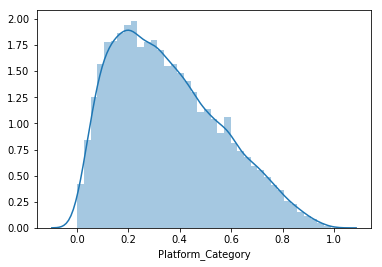

In [41]:
sns.distplot(var_explained)

In [134]:
to_keep = variances <= 0.2

# Checkpoint

In [42]:
pd.to_pickle((blood, blood_annot, var_explained), "tmp.pkl")

In [6]:
blood, blood_annot, var_explained = pd.read_pickle("tmp.pkl")

In [290]:
blood_adata = sc.AnnData(blood.T, obs=blood_annot)

In [297]:
blood_adata.obs.columns

Index(['display_metadata', 'tier1', 'tier2', 'tier3', 'celltype',
       'display_metadata', 'Dataset', 'dataset_name', 'chip_id',
       'replicate_group_id', 'organism', 'sample_type', 'generic_sample_type',
       'final_cell_type', 'parental_cell_type', 'sex', 'labelling', 'name',
       'description', 'number of samples', 'sample types', 'platform',
       'project', 'species', 'Detection threshold', 'Platform_Category',
       'Platform_Colour', 'Platform_Symbol'],
      dtype='object')

In [298]:
blood_adata.obs["name"]

GSM994853;6463                   Segura
GSM994851;6463                   Segura
FANTOM6-7;7079       Kurowska-Stolarska
FANTOM-15;7079       Kurowska-Stolarska
FANTOM6-5;7079       Kurowska-Stolarska
FANTOM9;7079         Kurowska-Stolarska
FANTOM11;7079        Kurowska-Stolarska
FANTOM-17;7079       Kurowska-Stolarska
FANTOM13;7079        Kurowska-Stolarska
FANTOM-19;7079       Kurowska-Stolarska
FANTOM-14;7079       Kurowska-Stolarska
FANTOM-16;7079       Kurowska-Stolarska
FANTOM-20;7079       Kurowska-Stolarska
FANTOM12;7079        Kurowska-Stolarska
FANTOM-18;7079       Kurowska-Stolarska
FANTOM10;7079        Kurowska-Stolarska
FANTOM6-6;7079       Kurowska-Stolarska
FANTOM6-1;7079       Kurowska-Stolarska
FANTOM6-3;7079       Kurowska-Stolarska
FANTOM6-2;7079       Kurowska-Stolarska
FANTOM6-4;7079       Kurowska-Stolarska
FANTOM31;7079        Kurowska-Stolarska
FANTOM29;7079        Kurowska-Stolarska
FANTOM27;7079        Kurowska-Stolarska
FANTOM21;7079        Kurowska-Stolarska


In [305]:
blood_adata.obs = blood_adata.obs.iloc[:, 1:]

In [306]:
blood_adata.write_h5ad("../data/blood_atlas.h5ad", compression="gzip")

... storing 'display_metadata' as categorical


In [289]:
blood_annot

,display_metadata,tier1,tier2,tier3,celltype,display_metadata,Dataset,dataset_name,chip_id,replicate_group_id,...,description,number of samples,sample types,platform,project,species,Detection threshold,Platform_Category,Platform_Colour,Platform_Symbol
GSM994853;6463,TRM tumor ascites HLA-DR+ CD11c+ CD16+ BDCA1- ...,in vivo,TRM,tumor associated macrophage,macrophage,TRM tumor ascites HLA-DR+ CD11c+ CD16+ BDCA1- ...,6463.0,Segura,GSM994853,Macrophages inflammatory ascites donor 4,...,Dendritic cells (DCs) are critical regulators ...,20.0,"CD14dim CD16- Mo, CD14+CD16- Mo, TAM, BDCA1+ D...",Microarray (Affymetrix HuGene-1_1-ST (GPL11532)),NaN,Homo sapiens,3.04,HuGene,"rgb(0,109,219)",diamond-open
GSM994851;6463,TRM tumor ascites HLA-DR+ CD11c+ CD16+ BDCA1- ...,in vivo,TRM,tumor associated macrophage,macrophage,TRM tumor ascites HLA-DR+ CD11c+ CD16+ BDCA1- ...,6463.0,Segura,GSM994851,Macrophages inflammatory ascites donor 3,...,Dendritic cells (DCs) are critical regulators ...,20.0,"CD14dim CD16- Mo, CD14+CD16- Mo, TAM, BDCA1+ D...",Microarray (Affymetrix HuGene-1_1-ST (GPL11532)),NaN,Homo sapiens,3.04,HuGene,"rgb(0,109,219)",diamond-open
FANTOM6-7;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM6-7,FANTOM6-7 Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM-15;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM-15,FANTOM-15¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM6-5;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM6-5,FANTOM6-5¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM9;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM9,FANTOM9¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM11;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM11,FANTOM11¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM-17;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM-17,FANTOM-17¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM13;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM13,FANTOM13¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross
FANTOM-19;7079,TRM Gut CD206- adult,in vivo,myeloid,gut macrophage,macrophage,TRM Gut CD206- adult,7079.0,Kurowska-Stolarska,FANTOM-19,FANTOM-19¬†Gut CD206-,...,Kurowska-Stolarska_2016_S4M-7079_PRIVATE,33.0,"Gut CD206-, Gut CD206+, synovium CD206-, synov...",RNASeq (Illumina NextSeq 500 hg19),NaN,Homo sapiens,NaN,RNASeq,"rgb(0,146,146)",cross


In [288]:
blood

,GSM994853;6463,GSM994851;6463,FANTOM6-7;7079,FANTOM-15;7079,FANTOM6-5;7079,FANTOM9;7079,FANTOM11;7079,FANTOM-17;7079,FANTOM13;7079,FANTOM-19;7079,...,GSM1210383;6339,GSM1210384;6339,GSM1210396;6339,GSM1210397;6339,GSM1210398;6339,GSM1210399;6339,GSM1210400;6339,GSM1210393;6339,GSM1210394;6339,GSM1210395;6339
ENSG00000000003,3.33278,4.16270,0.084470,0.000000,0.156173,0.780501,0.050196,0.944161,2.161089,0.000000,...,6.184306,6.701142,3.272074,3.658898,3.533382,3.299137,3.647660,5.740131,4.430764,4.609542
ENSG00000000005,3.28012,3.34402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.722203,1.665041,1.935963,1.589004,1.808742,1.417300,1.645999,1.779135,1.446061,1.675059
ENSG00000000419,10.34765,10.68934,3.180372,2.685402,4.885845,3.635613,3.318937,3.908029,3.355088,3.374633,...,9.266823,9.977903,10.142088,10.315200,10.121450,10.679456,10.492519,9.846215,10.019621,10.149682
ENSG00000000938,10.36331,10.70236,6.820916,5.642872,6.692358,6.115849,5.535635,5.583088,6.211880,5.697062,...,3.077604,2.696972,3.837414,4.922661,4.955829,4.999937,5.571717,4.593247,3.563550,4.504524
ENSG00000000971,6.23841,4.76062,0.951092,0.709072,1.874042,1.264138,0.814717,0.724494,1.813571,0.542857,...,6.303753,5.828390,2.351645,3.965674,3.667129,4.335882,5.184721,6.324902,6.363524,7.365573
ENSG00000001036,9.68525,9.42119,3.158733,3.273286,3.207503,3.370373,3.939525,3.390222,3.305614,3.520020,...,4.825516,5.089122,4.981588,6.188980,6.491149,6.269858,6.846581,7.038958,6.710265,7.059249
ENSG00000001167,8.44912,8.45983,3.597827,2.966460,2.991936,2.928980,3.305933,3.563096,3.301552,2.959077,...,7.831354,6.590173,9.259506,8.829111,8.071375,8.546217,7.883357,8.103852,8.330205,8.612001
ENSG00000001460,4.29170,4.60856,0.554923,0.500647,0.204511,0.263422,0.166876,0.586091,0.150252,0.000000,...,2.649951,2.837922,2.457807,2.772336,2.980270,2.765645,2.633874,2.898281,2.924215,2.638924
ENSG00000001461,6.34554,6.00545,1.425755,1.124327,0.607644,1.050548,1.200138,1.739645,1.209586,0.583588,...,6.646028,5.050112,6.291900,6.891822,6.046198,6.205022,6.234156,6.468761,6.594477,6.814441
ENSG00000001497,7.67193,7.47149,2.999383,2.396219,2.260585,2.464756,2.221218,2.577116,2.297504,2.741105,...,6.358706,7.695070,8.265457,8.716188,8.405536,8.963805,8.594710,7.859035,7.995293,8.017580


In [43]:
filtered_ranked = spearman_rank(blood.loc[var_explained <= .3])

In [7]:
filtered_ranked = spearman_rank(blood.loc[to_keep])

# PCA + plotting

In [ ]:
import plotly.express as px

In [191]:
pca = PCA(n_components=10, svd_solver="arpack")

In [202]:
coords = pca.fit_transform(filtered_ranked.transpose())

In [203]:
plotdf = pd.DataFrame(
    coords, 
    columns=[f"PC{i+1}" for i in range(coords.shape[1])], index=blood_annot.index
)
plotdf = plotdf.join(blood_annot)

In [22]:
plotdf.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'display_metadata', 'tier1', 'tier2', 'tier3', 'celltype',
       'display_metadata', 'Dataset', 'dataset_name', 'chip_id',
       'replicate_group_id', 'organism', 'sample_type', 'generic_sample_type',
       'final_cell_type', 'parental_cell_type', 'sex', 'labelling', 'name',
       'description', 'number of samples', 'sample types', 'platform',
       'project', 'species', 'Detection threshold', 'Platform_Category',
       'Platform_Colour', 'Platform_Symbol'],
      dtype='object')

In [24]:
?px.scatter_3d

In [204]:
px.scatter_3d(
    plotdf,
    x="PC1",
    y="PC2",
    z="PC3",
    color="celltype"
)

In [46]:
px.scatter_3d(
    plotdf,
    x="PC1",
    y="PC2",
    z="PC3",
    color="celltype"
)

# Projecting new data

In [47]:
import scanpy as sc

In [62]:
from itertools import chain, repeat

In [48]:
single_cell = sc.read("../constclust/probably_human.h5ad")

In [224]:
def simulate_bulk(adata, by, skip_groups=(), n_samples=1, n_draws=None):
    """
    Simulate bulk data by summing single cells
    """
    sampled_from = []
    if n_draws is None:
        n_draws = np.inf
    new = pd.DataFrame(index=adata.var_names)
    for key, subdf in adata.obs.groupby(by):
        if key in skip_groups:
            continue
        sampled_from.append(key)
        subset = adata[subdf.index]
        for i in range(n_samples):
            sampled = subset.X[
                np.random.choice(
                    np.arange(len(subset.obs_names)),
                    size=min(n_draws, len(subset.obs_names)), 
                    replace=False)
            ].sum(axis=0)
            new[f"{key}_{i}"] = np.ravel(sampled)
    new_obs = pd.DataFrame(
        {
            by: list(chain.from_iterable(
                repeat(k, n_samples) for k in sampled_from
            )),
        },
        index=new.columns
    )
    if pd.api.types.is_categorical_dtype(adata.obs[by]):
        new_obs[by] = pd.Categorical(new_obs[by], categories=adata.obs[by].cat.categories)
    colorkey = f"{by}_colors"
    if colorkey in adata.uns:
        uns = {colorkey: adata.uns[colorkey]}
    else:
        uns = {}
    return sc.AnnData(new.T, obs=new_obs, uns=uns)

In [265]:
sim = simulate_bulk(single_cell, "consistent", skip_groups=(""), n_samples=10, n_draws=30)

In [226]:
sim = simulate_bulk(single_cell, "consistent", skip_groups=(""), n_samples=1)

In [175]:
sim.obs[]

AnnData object with n_obs × n_vars = 11 × 15353 
    obs: 'consistent'
    uns: 'consistent_colors'

In [266]:
sim.var["ensembl_id"] = single_cell.var["ensembl_id"]

In [267]:
simdf = sim.to_df().T

In [268]:
simdf.index = single_cell.var["ensembl_id"]

In [269]:
new_df = pd.DataFrame(0., columns=simdf.columns, index=filtered_ranked.index)

In [270]:
new_df.loc[:, :] = simdf

In [271]:
new_df[new_df.isna()] = 0

In [283]:
w_sim_data = filtered_ranked.join(spearman_rank(new_df))

In [284]:
w_sim_data.shape

(6049, 963)

In [285]:
filtered_ranked.shape

(6049, 853)

In [273]:
tmp = sim.obs.copy()

In [274]:
tmp = tmp.rename(columns={"consistent": "celltype"})

In [276]:
w_sim_annot = blood_annot[["celltype"]].append(tmp)
w_sim_annot["symbol"] = "x"
w_sim_annot.loc[tmp.index, "symbol"] = "o"

In [277]:
w_sim_annot["celltype"].value_counts()

monocyte                                295
dendritic cell                          162
hematopoietic stem progenitor cell       79
macrophage                               53
T cell                                   49
B cell                                   33
microglia                                25
lymphocyte                               21
haematopoietic stem progenitor cell      20
peripheral blood mononuclear cell        16
natural killer cell                      15
granulocyte                              10
12                                       10
1                                        10
5                                        10
3                                        10
2                                        10
10                                       10
0                                        10
7                                        10
9                                        10
4                                        10
8                               

In [256]:
coords.shape

(853, 10)

In [278]:
new_coords = np.concatenate((coords, pca.transform(spearman_rank(new_df).T)))

In [258]:
coords.shape

(853, 10)

In [260]:
assert np.all(new_coords[:853, :] == coords)

In [261]:
new_coords.shape

(886, 10)

array([[ -7.74350447,  -1.74653349,  -0.52915663, ...,   0.57240755,
         -0.9475027 ,  -0.55775465],
       [ 12.47288383,  -0.66186969,  -0.18272389, ...,   0.19434406,
          0.33444852,  -0.29527428],
       [ 10.2424902 ,   4.01239114,   2.89129344, ...,  -1.13608258,
          0.83717177,  -0.10540629],
       ...,
       [-11.86919127,   0.08117827,   0.6948976 , ...,  -0.03980964,
          0.19032891,   0.52262171],
       [ -5.76566163,  -0.98055481,  -0.65220466, ...,  -0.61126002,
          0.48358392,   0.14422377],
       [ -7.47674419,   0.64973621,   0.24151474, ...,  -0.33501033,
          0.61586719,   1.21888702]])

In [279]:
plotdf = pd.DataFrame(
    new_coords,
    columns=[f"PC{i+1}" for i in range(10)], index=w_sim_annot.index
)
plotdf = plotdf.join(w_sim_annot)

In [280]:
px.scatter_3d(
    plotdf,
    x="PC1",
    y="PC2",
    z="PC3",
    color="celltype",
    symbol="symbol"
)

## Transform the whole thing

In [286]:
plotdf = pd.DataFrame(
    PCA(n_components=10, svd_solver="arpack").fit_transform(w_sim_data.T),
    columns=[f"PC{i+1}" for i in range(10)], index=w_sim_annot.index
)
plotdf = plotdf.join(w_sim_annot)

In [287]:
px.scatter_3d(
    plotdf,
    x="PC1",
    y="PC2",
    z="PC3",
    color="celltype",
    symbol="symbol"
)

In [ ]:
sc.pp.neighbors(co)